In [1]:
# Importation bibliothèques et modules Python
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split


bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

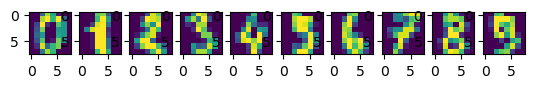

In [2]:
# Importation du dataset digits de scikit-learn
from sklearn.datasets import load_digits

# Sauvegarde du dataset digits de scikit-learn dans la variable digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [3]:
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [4]:
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# Chargement du modèle decision tree classifier
clf = tree.DecisionTreeClassifier()

# Application du modèle random forest à nos données
clf.fit(X_train, y_train)

# Prédiction du modèle sur les données de test
Z = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy=clf.score(X_test,y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))

Accuracy = 0.6835599505562423


In [5]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.8
0.8888888888888888
0.8333333333333334
0.8555555555555555
0.8333333333333334
0.8555555555555555
0.8666666666666667
0.8666666666666667
0.9
0.8222222222222222
0.8333333333333334
0.7666666666666667
0.9111111111111111
0.8333333333333334
0.8555555555555555
0.8222222222222222
0.8555555555555555
0.8888888888888888
0.8333333333333334
0.8777777777777778
0.8111111111111111
0.8
0.8333333333333334
0.8666666666666667
0.8444444444444444
0.8
0.9111111111111111
0.8222222222222222
0.8444444444444444
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.9111111111111111
0.8777777777777778
0.8333333333333334
0.8888888888888888
0.9
0.8111111111111111
0.8777777777777778
0.9111111111111111
0.9222222222222223
0.9
0.8444444444444444
0.8666666666666667
0.8222222222222222
0.7444444444444445
0.8555555555555555
0.8555555555555555
0.8666666666666667
0.8555555555555555
0.8444444444444444
0.8555555555555555
0.9444444444444444
0.8666666666666667
0.8111111111111111
0.8333333333333334
0.8555555555555555
0.84444

In [6]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [7]:
# Application du modèle random forest à nos données
clf.fit(X_train, y_train)

# Prédiction du modèle sur les données de test
Z = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy=clf.score(X_test,y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))

Accuracy = 0.9777777777777777


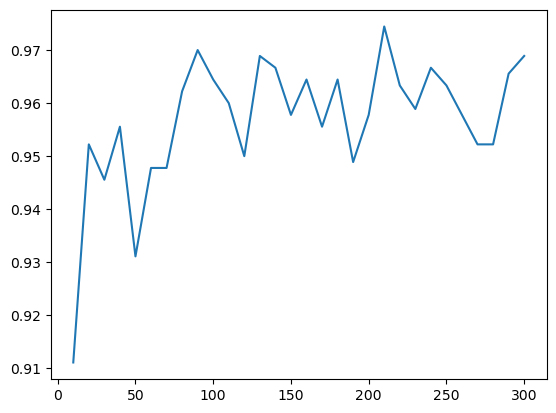

In [8]:
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    # Application du modèle bagging classifier
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    
    # Application du modèle aux données d'entrainement
    clf.fit(X_train, y_train)
    
    # Prédiction sur les données de test
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [9]:
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.946607341490545
max_samples: 0.8
max_features: 0.6


In [10]:
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Chargement du modèle random forest classifier
clf = RandomForestClassifier(n_estimators=200)

# Application du modèle
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [12]:
# prédiction des résultats du modèle random forest classifier
y_pred = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy = clf.score(X_test, y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))


Accuracy = 0.9035846724351051


In [53]:
# Chargement et application du modèle decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

# Chargement et application du modèle bagging classifier
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

# Chargement et application du modèle random forest classifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.7218788627935723
Bagging (200 arbres) : 0.896168108776267
Forêt aléatoire (200 arbres) : 0.9208899876390606


In [13]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9318131256952169 0.012838335548657044
0.9593993325917685 0.008147515051047808


10 0.9299221357063404
20 0.9510567296996663
30 0.9566184649610678
40 0.96440489432703
50 0.96440489432703
60 0.9632925472747497
70 0.967741935483871
80 0.967741935483871
90 0.9632925472747497
100 0.9666295884315906
110 0.9655172413793104
120 0.9699666295884316
130 0.9699666295884316
140 0.967741935483871
150 0.9699666295884316
160 0.9699666295884316
170 0.9655172413793104
180 0.9688542825361512
190 0.9699666295884316
200 0.9721913236929922
210 0.9655172413793104
220 0.9721913236929922
230 0.9666295884315906
240 0.96440489432703
250 0.9733036707452726
260 0.9688542825361512
270 0.9699666295884316
280 0.9699666295884316
290 0.9655172413793104
300 0.9666295884315906


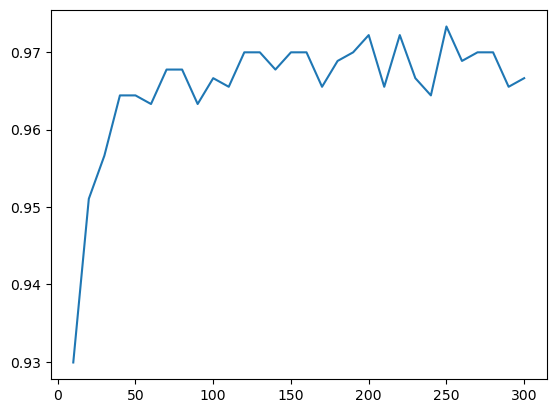

In [14]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : {}".format(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : {}".format(accuracy))

Forêt aléatoire : 0.96440489432703
Extra Trees : 0.978865406006674


In [16]:
from sklearn.ensemble import AdaBoostClassifier

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)

# Application du modèle AdaBoostClassifier
clf.fit(X_train, y_train)

# Calcul de l'accuracy du modèle sur les données de test
accuracy = clf.score(X_test, y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))

Accuracy = 0.8819530284301607
